In [47]:
#import libraries
import torch
import torchvision.transforms as T
from transformers import AutoFeatureExtractor, AutoModel
from PIL import Image
import numpy as np
import pandas as pd
import os

In [48]:
#setting pretrained model using huggingface Automodel
model_ckpt = "google/vit-base-patch16-224"
extractor = AutoFeatureExtractor.from_pretrained(model_ckpt)
model = AutoModel.from_pretrained(model_ckpt)
#hidden_dim = model.config.hidden_size

/Users/stephenthorpe/anaconda3/envs/pytorch/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [73]:
# Data transformation chain. Not using this right now as it wouldn't export to tensor properly
transformation_chain = T.Compose(
    [
        # We first resize the input image to 256x256 and then we take center crop.
        T.Resize(int((256 / 224) * extractor.size["height"])),
        T.CenterCrop(extractor.size["height"]),
        T.ToTensor(),
        T.Normalize(mean=extractor.image_mean, std=extractor.image_std),
    ]
)

In [76]:
# Define the transformation chain for preprocessing images
transformation_chain = extractor.preprocess

In [107]:
#Function to extract the embedding using the model, hide print if we have a lot of images

def extract(file):
    file = Image.open(file)
    display(file)
    inputs = extractor(images=file, return_tensors="pt")
#    inputs = {k: v.to(model.device) for k, v in inputs.items()}
#    with torch.no_grad():    
    outputs = model(**inputs).last_hidden_state[:, 0]
  #add -> output_hidden_states=True to model() to access hidden layer vectors/tensors  

#  print(len(outputs.pooler_output))
#  print(outputs.pooler_output)
    print('-----------')
    return outputs
    #append .detach().numpy() to remove tensor

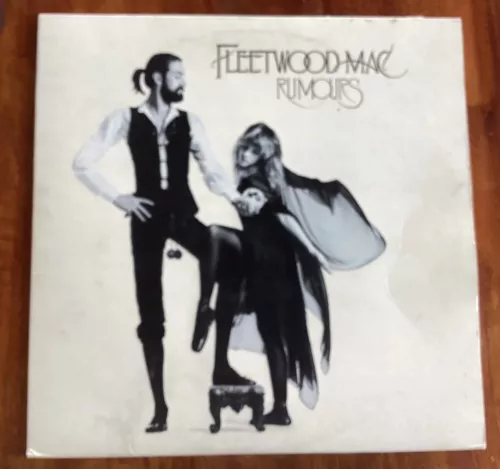

-----------


tensor([[ 6.0757e-03,  3.5515e-01,  1.5557e+00, -1.2434e+00, -2.2649e+00,
          5.8638e-01,  9.5084e-01,  6.8821e-01, -3.6526e-01, -2.4592e-01,
         -8.0307e-01, -5.6614e-01,  1.9655e+00, -6.5450e-01,  6.1170e-01,
         -1.3710e-01,  2.1928e-01, -5.6308e-01,  4.8314e-01,  1.2246e+00,
          4.4360e-01, -9.8598e-01, -1.5138e-01,  4.3367e-02, -1.2993e-01,
         -3.7560e-01,  1.0669e+00, -1.0845e-01, -1.5744e+00, -5.5899e-01,
         -3.7631e-01, -2.9974e-01, -1.0782e+00, -7.5400e-01,  1.1769e+00,
         -8.5646e-01,  9.5902e-01,  1.7638e+00, -4.4712e-02,  3.4104e-01,
          8.6382e-01,  7.2365e-01, -6.2858e-01, -2.4694e+00,  1.4416e+00,
          7.7583e-01,  3.2983e-01, -1.4489e+00,  4.8019e-01,  9.3617e-01,
         -1.0624e+00, -7.3801e-01,  5.2379e-01, -3.7807e-01,  2.2816e-01,
          2.5788e-01, -3.4063e-01, -8.8404e-02, -1.2859e+00,  7.0665e-01,
         -1.0930e+00, -1.4430e+00, -8.0105e-01,  9.4381e-01,  5.6864e-01,
         -7.2433e-01,  4.2019e-01, -2.

In [108]:
# get embeddings from a new image to compare to our dataset
origin_embedding = extract('input-images/' + 'origin-image.webp')
#origin_embedding = list(origin_embedding)
origin_embedding

In [104]:
#import our dataset with images
#df = pd.read_csv('scraping/EBAY_vinyl-records_2024-05-10-.csv')
df.head(5)

,ebay_id,title,location,condition,artist,release_year,image_url,sleeve_grading,record_grading,sold_date,sold,shipping_cost,image_file,image_embedding
0,4.049467e+11,Vtg Fleetwood Mac - Rumours Vinyl Record LP & ...,"Located in: Henderson, North Carolina, United ...",Used: An item that has been used previously. S...,Fleetwood Mac,1977,https://i.ebayimg.com/images/g/8KoAAOSwEFpmLZ5...,NaN,NaN,NaN,19.90,4.87,8KoAAOSwEFpmLZ53_s-l500.webp,"[[1.432895, -1.5375918, 0.9917184, -0.6840542,..."
1,2.261252e+11,Fleetwood Mac - Rumours - 1977 - Warner Bros B...,"Located in: Keyport, New Jersey, United States",Used: An item that has been used previously. S...,"Fleetwood Mac, Lindsey Buckingham, Stevie Nicks",1977,https://i.ebayimg.com/images/g/u0cAAOSwGdJmM89...,Good Plus (G+),Very Good Plus (VG+),NaN,13.50,4.85,u0cAAOSwGdJmM89m_s-l500.webp,"[[1.3305242, -0.16204205, 1.6323817, -1.457420..."
2,3.951387e+11,Barry White Vinyl Record Lot - Can't Get Enoug...,"Located in: Merrimack, New Hampshire, United S...",UsedAn item that has been used previously. See...,"BEATLES, Barry White",NaN,https://i.ebayimg.com/images/g/rVIAAOSwE1NlptS...,NaN,NaN,NaN,49.99,NaN,rVIAAOSwE1NlptSv_s-l500.webp,"[[0.28039098, 0.6433893, 0.18588823, -1.859955..."
3,1.667386e+11,FLEETWOOD MAC - Rumours - Vinyl L.P Warner Bro...,"Located in: Saint Louis, Missouri, United States",Used: An item that has been used previously. S...,Fleetwood Mac,1977,https://i.ebayimg.com/images/g/zK0AAOSwEFpmJj0...,Very Good (VG),Good Plus (G+),"May 06, 2024 16:11:12 PDT",16.00,5.50,zK0AAOSwEFpmJj0Q_s-l500.webp,"[[0.7910292, 0.19417451, 1.2784475, -1.6964996..."
4,2.047300e+11,CREAM ERIC CLAPTON LP VINYL LOT ORIGINAL LAYLA...,"Located in: Patchogue, New York, United States",Used: An item that has been used previously. S...,"Cream, Eric Clapton, Derek and the Dominos",NaN,https://i.ebayimg.com/images/g/KSYAAOSwmb1mEZZ...,Very Good Plus (VG+),Excellent (EX),"Apr 11, 2024 17:02:23 PDT",41.00,5.61,KSYAAOSwmb1mEZZh_s-l1600.webp,"[[1.3392135, 1.1973602, -1.6119115, -2.3291473..."


In [99]:
image_files = np.array(df.loc[0:50,'image_file'])
embeddings = [] 
for image in image_files:
    print('extracting image:', image)
    embedding = extract('scraping/files/' + image)
    embedding = embedding.detach().numpy() #convert from tensor object back to a normal 2d array
    row = [image, embedding]
    embeddings.append(row)
#add embedding to df for image
# Create a dictionary from the embeddings list
embeddings_dict = {name: embedding for name, embedding in embeddings}
# Update the 'image_embedding' column
df['image_embedding'] = df['image_file'].map(embeddings_dict)

extracting image: 8KoAAOSwEFpmLZ53_s-l500.webp
-----------
extracting image: u0cAAOSwGdJmM89m_s-l500.webp
-----------
extracting image: rVIAAOSwE1NlptSv_s-l500.webp
-----------
extracting image: zK0AAOSwEFpmJj0Q_s-l500.webp
-----------
extracting image: KSYAAOSwmb1mEZZh_s-l1600.webp
-----------
extracting image: 5ocAAOSwilxmMV~O_s-l1600.webp
-----------
extracting image: czIAAOSwC2xlDQ1-_s-l500.webp
-----------
extracting image: xO0AAOSwQA9mGDCo_s-l1600.webp
-----------
extracting image: NQ4AAOSwWp5mO35B_s-l500.webp
-----------
extracting image: 7XMAAOSwZRtmMMZs_s-l1600.webp
-----------
extracting image: 7bgAAOSw209luw2R_s-l1600.webp
-----------
extracting image: itgAAOSwq5Fl7gkb_s-l1600.webp
-----------
extracting image: xX4AAOSwih9mCNah_s-l1600.webp
-----------
extracting image: uOgAAOSwsStmFK-u_s-l1600.webp
-----------
extracting image: V1MAAOSwkSZl8biO_s-l500.webp
-----------
extracting image: s7oAAOSwu5dmMaEM_s-l500.webp
-----------
extracting image: nFkAAOSwHUtmGbOU_s-l1600.webp


In [100]:
from torch.nn.functional import cosine_similarity

In [101]:
# run through df embeddings and calc cosine distance from original image then order smallest
# to largest with filename as reference
image_embeddings = np.array(df.iloc[0:50, [12, 13]])
distances = []
for i in range(len(image_embeddings)):
    image_file = df.iloc[i, 12]
    image_embedding = df.iloc[i, 13]  
    image_embedding = torch.tensor(image_embedding) #change back to a tensor object to use below
    dist = cosine_similarity(origin_embedding, image_embedding, dim=1).detach().numpy()
#    dist = float(distance.cdist([origin_embedding], [image_embedding], metric)[0])
    row = [image_file, dist]
    distances.append(row) 
#sorted_distances = sorted(distances, reverse = False)#as we are measure similarity and NOT distance don't reverse list 
sorted_distances = sorted(distances, key=lambda x: x[1])

In [102]:
sorted_distances

[['7pMAAOSwyONmMMZc_s-l300.webp', array([0.1156846], dtype=float32)],
 ['7XMAAOSwZRtmMMZs_s-l1600.webp', array([0.1310614], dtype=float32)],
 ['0nQAAOSwOjFmNBIF_s-l1600.webp', array([0.20029044], dtype=float32)],
 ['c8MAAOSwZh9lCNXW_s-l500.webp', array([0.20407608], dtype=float32)],
 ['n~8AAOSwFzlmL8Qb_s-l1600.webp', array([0.22806565], dtype=float32)],
 ['V1MAAOSwkSZl8biO_s-l500.webp', array([0.23211738], dtype=float32)],
 ['jtUAAOSwd9dmAdub_s-l500.webp', array([0.25622174], dtype=float32)],
 ['5ocAAOSwilxmMV~O_s-l1600.webp', array([0.260482], dtype=float32)],
 ['ZaUAAOSw8Y1mNnjI_s-l1600.webp', array([0.26190034], dtype=float32)],
 ['yx0AAOSwH6lmOTjB_s-l1600.webp', array([0.27270764], dtype=float32)],
 ['xO0AAOSwQA9mGDCo_s-l1600.webp', array([0.2764693], dtype=float32)],
 ['xX4AAOSwih9mCNah_s-l1600.webp', array([0.27837127], dtype=float32)],
 ['itgAAOSwq5Fl7gkb_s-l1600.webp', array([0.288583], dtype=float32)],
 ['xhwAAOSwmZpmM7Uz_s-l1600.webp', array([0.29335257], dtype=float32)],
 ['

In [88]:
#sorted_distances = sorted(distances, key=lambda x: x[1])

Your items value based on 50 comparable items sold is:

--$ 28.49846341463415 --

-> Min Price sold: $ 0.99
-> Max Price sold: $ 718.0
 
Details -> Top  50  most similar items found:



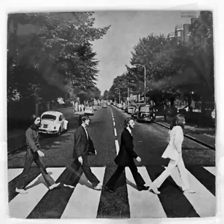

Distance from original: [0.1156846]


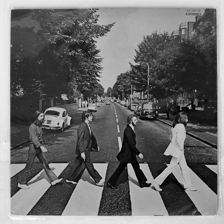

Distance from original: [0.1310614]


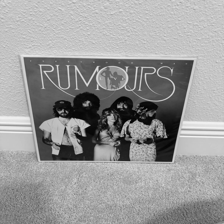

Distance from original: [0.20029044]


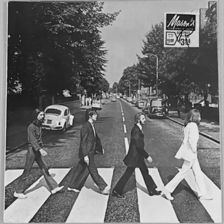

Distance from original: [0.20407608]


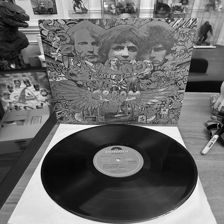

Distance from original: [0.22806565]


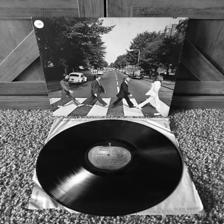

Distance from original: [0.23211738]


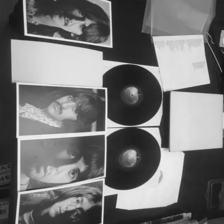

Distance from original: [0.25622174]


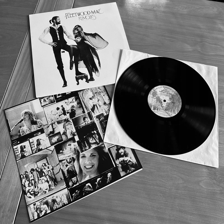

Distance from original: [0.260482]


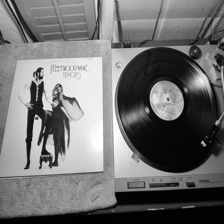

Distance from original: [0.26190034]


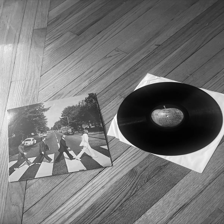

Distance from original: [0.27270764]


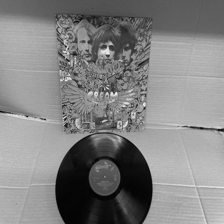

Distance from original: [0.2764693]


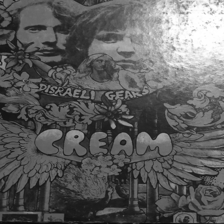

Distance from original: [0.27837127]


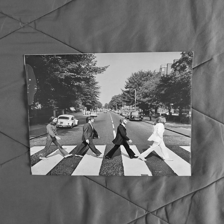

Distance from original: [0.288583]


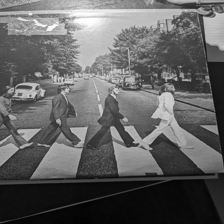

Distance from original: [0.29335257]


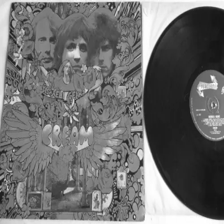

Distance from original: [0.29495135]


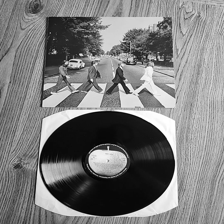

Distance from original: [0.3089754]


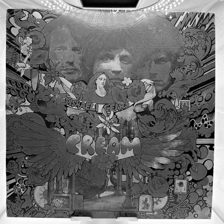

Distance from original: [0.30960155]


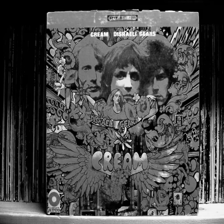

Distance from original: [0.31474897]


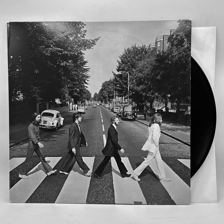

Distance from original: [0.32197687]


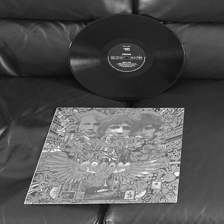

Distance from original: [0.32926443]


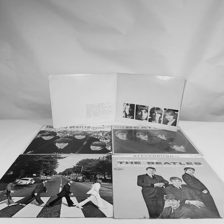

Distance from original: [0.344708]


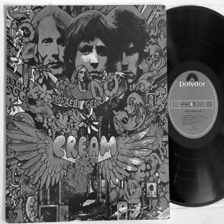

Distance from original: [0.34636682]


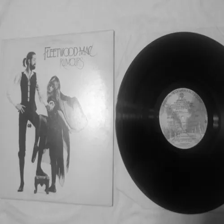

Distance from original: [0.3474852]


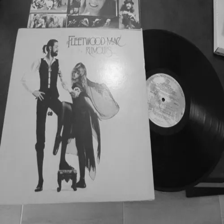

Distance from original: [0.35643092]


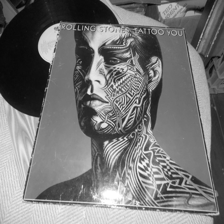

Distance from original: [0.35934216]


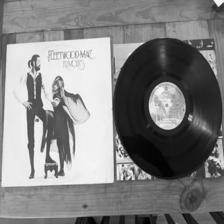

Distance from original: [0.36198875]


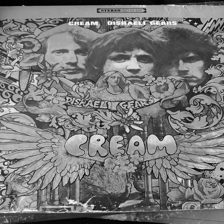

Distance from original: [0.38399988]


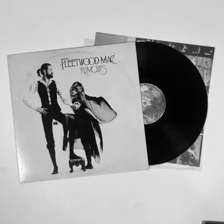

Distance from original: [0.39386457]


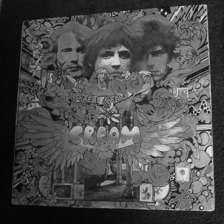

Distance from original: [0.42491245]


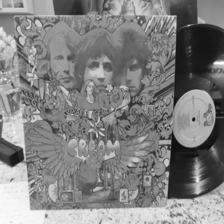

Distance from original: [0.42497128]


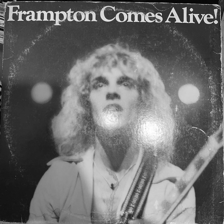

Distance from original: [0.4267236]


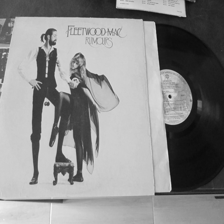

Distance from original: [0.42953318]


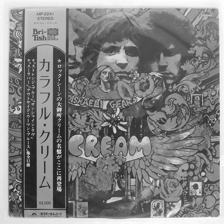

Distance from original: [0.43602458]


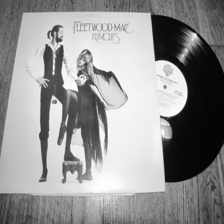

Distance from original: [0.43928033]


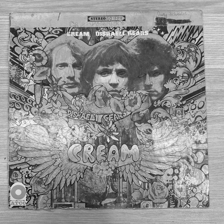

Distance from original: [0.4502829]


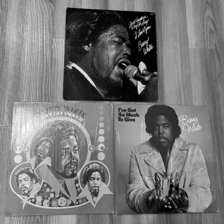

Distance from original: [0.45100042]


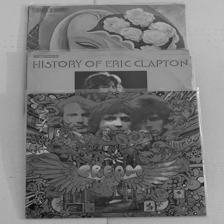

Distance from original: [0.45246875]


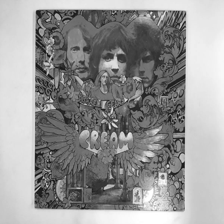

Distance from original: [0.4616712]


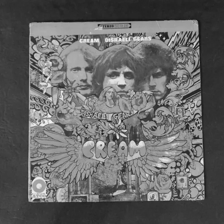

Distance from original: [0.4626961]


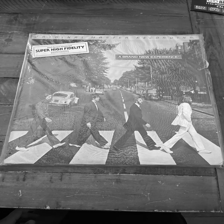

Distance from original: [0.46438158]


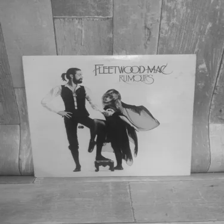

Distance from original: [0.4824394]


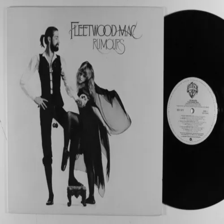

Distance from original: [0.5257265]


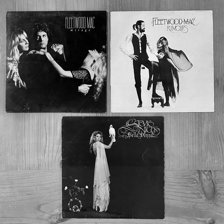

Distance from original: [0.57817113]


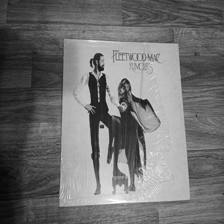

Distance from original: [0.61602557]


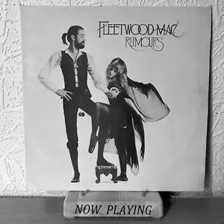

Distance from original: [0.6629609]


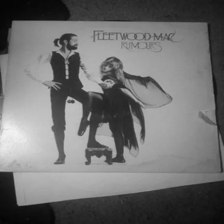

Distance from original: [0.70415384]


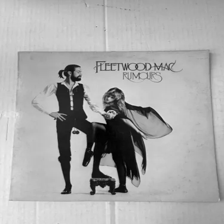

Distance from original: [0.7092403]


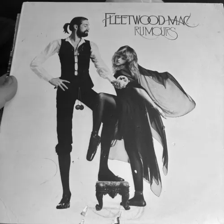

Distance from original: [0.71901447]


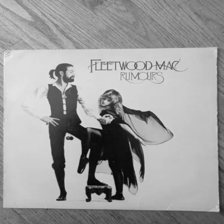

Distance from original: [0.79787755]


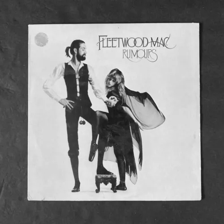

Distance from original: [0.80759346]


In [103]:
# display a list of top x most similar images/items with price etc:
print('Your items value based on',len(sorted_distances), 'comparable items sold is:')
print('')
print('--$',df['sold'].mean(),'--')
print('')
print('-> Min Price sold: $',df['sold'].min())
print('-> Max Price sold: $',df['sold'].max())
print(' ')
print('Details -> Top ', len(sorted_distances), ' most similar items found:')
print('')
i = 0
for image, distance in sorted_distances:
    file = Image.open('scraping/files/' + image).convert('L').resize(IMAGE_SHAPE)
    display(file)
    print('Distance from original:', distance)
#would be awesome to get a historic value of item (over past year at 1 month increments?)
#factor in other things like location, condition -> see records VG VG+ etc